### 상관계수를 이용한 추천 시스템

#### 기본 세팅

In [1]:
import pandas as pd, matplotlib.pylab as plt

In [2]:
df_rating = pd.read_csv('movie_review.csv')
df_rating

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [3]:
df_movie = pd.read_csv('movie_title.csv')
df_movie

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


#### user_id가 1인 사람은 어떤 영화에 별점 몇을 주었는가?

In [4]:
df_rating.loc[df_rating['user_id'] == 1, :]

,user_id,item_id,rating,timestamp
202,1,61,4,878542420
305,1,189,3,888732928
333,1,33,4,878542699
334,1,160,4,875072547
478,1,20,4,887431883
...,...,...,...,...
92049,1,28,4,875072173
92487,1,172,5,874965478
94019,1,122,3,875241498
96699,1,152,5,878542589


In [5]:
df = pd.merge(df_rating, df_movie, on='item_id')

In [6]:
df.loc[df['user_id'] == 1, :]

,user_id,item_id,rating,timestamp,title
202,1,61,4,878542420,Three Colors: White (1994)
305,1,189,3,888732928,"Grand Day Out, A (1992)"
333,1,33,4,878542699,Desperado (1995)
334,1,160,4,875072547,Glengarry Glen Ross (1992)
478,1,20,4,887431883,Angels and Insects (1995)
...,...,...,...,...,...
92049,1,28,4,875072173,Apollo 13 (1995)
92487,1,172,5,874965478,"Empire Strikes Back, The (1980)"
94019,1,122,3,875241498,"Cable Guy, The (1996)"
96699,1,152,5,878542589,Sleeper (1973)


In [7]:
# 영화별 리뷰 평균 구하기
df.groupby('title')['rating'].mean()

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: rating, Length: 1664, dtype: float64

In [8]:
# 영화별 리뷰 개수 구하기
df.groupby('title')['rating'].count()

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [10]:
df_movie['title'].nunique()

1664

In [11]:
df.shape

(100000, 5)

#### 각 영화별 리뷰의 개수를 차트로 표현
#### 어떤 영화는 리뷰가 많고, 어떤 영화는 리뷰가 적은지, 리뷰 개수의 분포 파악 가능

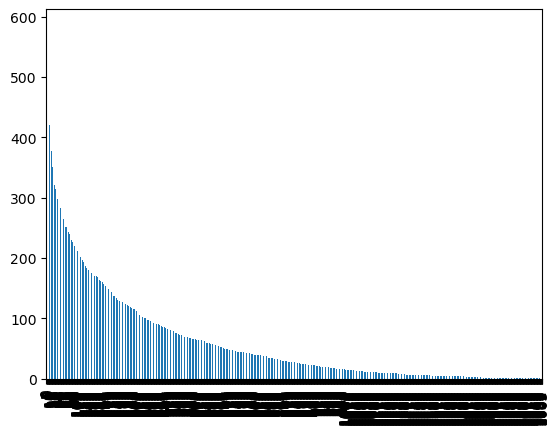

In [12]:
df['title'].value_counts().reset_index(drop=True).plot(kind='bar')
plt.show()


#### 각 영화별 별점 평균

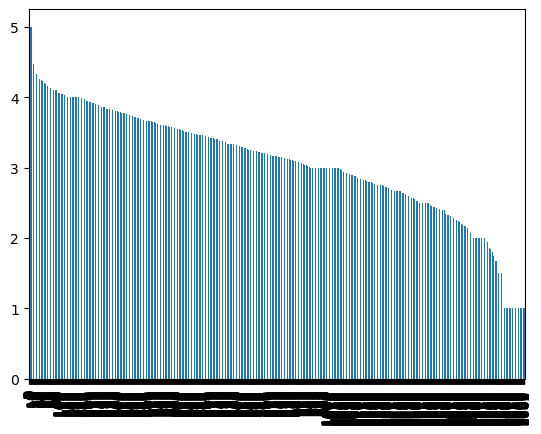

In [13]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index(drop=True).plot(kind='bar')
plt.show()

#### 각 영화의 별점 개수와 평균 한 번에 보기

In [14]:
df_count_mean = df.groupby('title')['rating'].agg(['count', 'mean'])
df_count_mean

,count,mean
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
...,...,...
Young Guns II (1990),44,2.772727
"Young Poisoner's Handbook, The (1995)",41,3.341463
Zeus and Roxanne (1997),6,2.166667


#### mean 컬럼으로 히스토그램 그리기. bin 개수는 50으로.

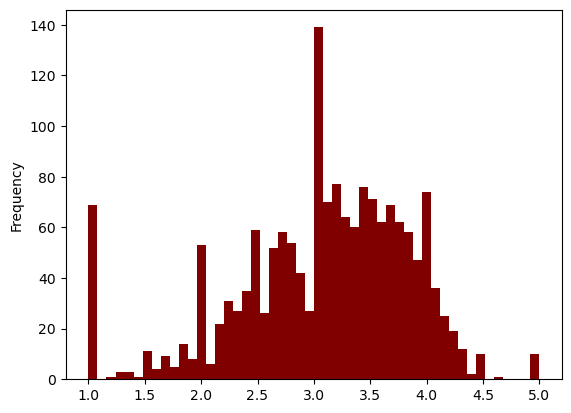

In [15]:
df_count_mean['mean'].plot(kind='hist', bins=50, color='maroon')
plt.show()

In [16]:
df_count_mean.describe()

,count,mean
count,1664.000000,1664.000000
mean,60.096154,3.077018
std,80.956484,0.780418
min,1.000000,1.000000
25%,7.000000,2.665094
50%,27.000000,3.162132
75%,80.250000,3.651808
max,583.000000,5.000000


In [17]:
df_count_mean.loc[(df_count_mean['mean'] == 1), :].sort_values('count', ascending=False)

,count,mean
title,,
3 Ninjas: High Noon At Mega Mountain (1998),5,1.0
Amityville 1992: It's About Time (1992),5,1.0
Amityville: A New Generation (1993),5,1.0
"Mighty, The (1998)",3,1.0
Gordy (1995),3,1.0
...,...,...
Lashou shentan (1992),1,1.0
"Leopard Son, The (1996)",1,1.0
Lotto Land (1995),1,1.0


*

#### Item-Based Collaborative Filtering
- 상관 계수 이용

In [18]:
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)
...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)


In [19]:
df.corr(numeric_only=True)

,user_id,item_id,rating,timestamp
user_id,1.000000,0.010377,-0.009371,0.019082
item_id,0.010377,1.000000,-0.189124,0.041867
rating,-0.009371,-0.189124,1.000000,-0.012003
timestamp,0.019082,0.041867,-0.012003,1.000000


In [20]:
df_car = pd.read_csv('fuel_econ.csv')

In [21]:
df_car.corr(numeric_only=True)

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
id,1.000000,0.985668,-0.060096,-0.074666,-0.006569,-0.021951,0.091800,0.091225,0.090593,0.095359,0.093803,-0.099717,-0.127873,-0.122321
year,0.985668,1.000000,-0.055313,-0.070424,0.006232,-0.033643,0.068050,0.066742,0.073290,0.077641,0.071993,-0.081165,-0.149829,-0.145141
cylinders,-0.060096,-0.055313,1.000000,0.933872,0.247571,-0.004264,-0.693103,-0.666029,-0.766275,-0.771503,-0.738023,0.848274,-0.783858,-0.781815
displ,-0.074666,-0.070424,0.933872,1.000000,0.259336,0.022072,-0.713479,-0.686166,-0.783984,-0.788457,-0.758397,0.855375,-0.793432,-0.791216
pv2,-0.006569,0.006232,0.247571,0.259336,1.000000,-0.665642,-0.278109,-0.272546,-0.296808,-0.298504,-0.290883,0.287200,-0.296088,-0.293156
pv4,-0.021951,-0.033643,-0.004264,0.022072,-0.665642,1.000000,0.035188,0.037869,0.074952,0.077442,0.047333,-0.050153,0.064876,0.065263
city,0.091800,0.068050,-0.693103,-0.713479,-0.278109,0.035188,1.000000,0.996377,0.915435,0.909658,0.989552,-0.904305,0.905681,0.898793
UCity,0.091225,0.066742,-0.666029,-0.686166,-0.272546,0.037869,0.996377,1.000000,0.899557,0.897814,0.981106,-0.885823,0.891297,0.884458
highway,0.090593,0.073290,-0.766275,-0.783984,-0.296808,0.074952,0.915435,0.899557,1.000000,0.992191,0.962757,-0.916456,0.914116,0.897585
UHighway,0.095359,0.077641,-0.771503,-0.788457,-0.298504,0.077442,0.909658,0.897814,0.992191,1.000000,0.956580,-0.912117,0.911355,0.894314


In [22]:
# 배기량 displ과 연비 comb의 관계 구하기

In [23]:
df_car.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [24]:
df_car.loc[:, ['displ', 'comb']].corr()

,displ,comb
displ,1.000000,-0.758397
comb,-0.758397,1.000000


#### 영화 간 상관계수 계산
- 피봇 테이블 이용하기 : 컬럼은 영화이름, 인덱스는 유저아이디, 밸류는 별점 평균

In [25]:
df.corr(numeric_only=True)

,user_id,item_id,rating,timestamp
user_id,1.000000,0.010377,-0.009371,0.019082
item_id,0.010377,1.000000,-0.189124,0.041867
rating,-0.009371,-0.189124,1.000000,-0.012003
timestamp,0.019082,0.041867,-0.012003,1.000000


In [26]:
df_matrix = df.pivot_table(index='user_id', columns='title', values='rating', aggfunc='mean')

In [27]:
# 타이타닉에 대해 유저가 준 점수 확인하기

In [28]:
df_matrix['Titanic (1997)'].notna().sum()

350

In [29]:
# 타이타닉과 관계가 높은 영화 찾기

In [30]:
df_a = df_matrix.corr(numeric_only=True)['Titanic (1997)'].sort_values(ascending=False).to_frame()

In [31]:
df_b = df.groupby('title')['rating'].count()

In [32]:
df_1 = pd.merge(df_a, df_b, on='title')
df_1

,Titanic (1997),rating
title,,
"Simple Wish, A (1997)",1.0,3
"Newton Boys, The (1998)",1.0,4
C'est arrivé près de chez vous (1992),1.0,4
"Wedding Gift, The (1994)",1.0,3
"Pest, The (1997)",1.0,8
...,...,...
Yankee Zulu (1994),NaN,1
You So Crazy (1994),NaN,1
Zeus and Roxanne (1997),NaN,6


In [33]:
df_1.dropna(inplace=True)

In [34]:
df_1.rename(columns={'rating' : 'count'}, inplace=True)

In [35]:
df_1.loc[df_1['count'] >= 80, :]

,Titanic (1997),count
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
...,...,...
Brazil (1985),-0.243532,208
Richard III (1995),-0.275451,89
Cold Comfort Farm (1995),-0.307150,125


#### 적어도 리뷰 개수가 50개 이상인 영화에 대한 상관계수

In [36]:
df_corr = df_matrix.corr(min_periods=50)

In [37]:
df.loc[df['user_id'] == 4, :]

,user_id,item_id,rating,timestamp,title
1250,4,264,3,892004275,Mimic (1997)
1329,4,303,5,892002352,Ulee's Gold (1997)
2204,4,361,5,892002353,Incognito (1997)
2526,4,357,4,892003525,One Flew Over the Cuckoo's Nest (1975)
3277,4,260,4,892004275,Event Horizon (1997)
5960,4,356,3,892003459,"Client, The (1994)"
12151,4,294,5,892004409,Liar Liar (1997)
13893,4,288,4,892001445,Scream (1996)
16305,4,50,5,892003526,Star Wars (1977)
18930,4,354,5,892002353,"Wedding Singer, The (1998)"


In [38]:
# 유저아이디 4번 입장에서 영화 추천 해주세요.

In [39]:
rating_user_4 = df.loc[df['user_id'] == 4, ['user_id', 'title', 'rating']].reset_index(drop=True)

In [40]:
rating_user_4

,user_id,title,rating
0,4,Mimic (1997),3
1,4,Ulee's Gold (1997),5
2,4,Incognito (1997),5
3,4,One Flew Over the Cuckoo's Nest (1975),4
4,4,Event Horizon (1997),4
5,4,"Client, The (1994)",3
6,4,Liar Liar (1997),5
7,4,Scream (1996),4
8,4,Star Wars (1977),5
9,4,"Wedding Singer, The (1998)",5


In [41]:
movie_title = rating_user_4.loc[1, 'title']
movie_rating = rating_user_4.loc[1, 'rating']

In [42]:
recom_movie = df_corr.loc[movie_title, :].dropna().sort_values(ascending=False).to_frame()

In [43]:
recom_movie.columns= ['correlation']

In [44]:
recom_movie

,correlation
title,
Ulee's Gold (1997),1.000000
"Mrs. Brown (Her Majesty, Mrs. Brown) (1997)",0.383585
Chasing Amy (1997),0.260593
Wag the Dog (1997),0.254141
"English Patient, The (1996)",0.236373
L.A. Confidential (1997),0.218987
Boogie Nights (1997),0.211633
"Full Monty, The (1997)",0.207730
Everyone Says I Love You (1996),0.199541


In [45]:
recom_movie['weight'] = recom_movie['correlation'] * movie_rating

In [46]:
recom_movie

,correlation,weight
title,,
Ulee's Gold (1997),1.000000,5.000000
"Mrs. Brown (Her Majesty, Mrs. Brown) (1997)",0.383585,1.917927
Chasing Amy (1997),0.260593,1.302965
Wag the Dog (1997),0.254141,1.270703
"English Patient, The (1996)",0.236373,1.181863
L.A. Confidential (1997),0.218987,1.094934
Boogie Nights (1997),0.211633,1.058167
"Full Monty, The (1997)",0.207730,1.038652
Everyone Says I Love You (1996),0.199541,0.997707


In [47]:
recom_movie.index[1]

'Mrs. Brown (Her Majesty, Mrs. Brown) (1997)'

In [48]:
(df_corr.loc[movie_title, :].dropna() * movie_rating).sort_values(ascending=False)

title
Ulee's Gold (1997)                             5.000000
Mrs. Brown (Her Majesty, Mrs. Brown) (1997)    1.917927
Chasing Amy (1997)                             1.302965
Wag the Dog (1997)                             1.270703
English Patient, The (1996)                    1.181863
L.A. Confidential (1997)                       1.094934
Boogie Nights (1997)                           1.058167
Full Monty, The (1997)                         1.038652
Everyone Says I Love You (1996)                0.997707
Liar Liar (1997)                               0.973823
Apt Pupil (1998)                               0.921210
Contact (1997)                                 0.902267
Fargo (1996)                                   0.877074
Good Will Hunting (1997)                       0.821528
Murder at 1600 (1997)                          0.809734
Titanic (1997)                                 0.773866
Jerry Maguire (1996)                           0.652457
Godfather, The (1972)                     

In [49]:
len(rating_user_4)

24

In [50]:
df_similar_movie = pd.DataFrame()
for i in range(len(rating_user_4)) :
    movie_title = rating_user_4['title'][i]
    movie_rating = rating_user_4['rating'][i]
    recom_movie = df_corr.loc[movie_title, :].dropna().sort_values(ascending=False).to_frame()
    recom_movie.columns = ['correlation']
    recom_movie['weight'] = recom_movie['correlation'] * movie_rating
    df_similar_movie = pd.concat([df_similar_movie, recom_movie])

In [51]:
# 중복 제거하되, weight 높은 걸로 남기기

In [61]:
# 1번 방식 : 반복문 사용하기

In [62]:
df_similar_movie = df_similar_movie.groupby('title')['weight'].max().to_frame().sort_values('weight', ascending=False)

In [63]:
for i in range(rating_user_4.shape[0]) :
    movie_title = rating_user_4['title'][i]
    if movie_title in df_similar_movie.index :
        df_similar_movie.drop(movie_title, axis=0, inplace=True)

In [64]:
df_similar_movie

,weight
title,
"Empire Strikes Back, The (1980)",3.739907
Return of the Jedi (1983),3.362779
Scream 2 (1997),2.824112
"Hunt for Red October, The (1990)",2.771915
Nell (1994),2.746152
...,...
Homeward Bound: The Incredible Journey (1993),-0.676706
"Fan, The (1996)",-0.759163
Three Colors: Blue (1993),-0.803453


In [60]:
# 2번 방식 : 반복문 안 쓰는 법

In [59]:
df_new = df_similar_movie.reset_index()
df_new.loc[~df_new['title'].isin(rating_user_4['title']), :]

,title,weight
15,"Empire Strikes Back, The (1980)",3.739907
16,Return of the Jedi (1983),3.362779
21,Scream 2 (1997),2.824112
22,"Hunt for Red October, The (1990)",2.771915
23,Nell (1994),2.746152
...,...,...
545,Homeward Bound: The Incredible Journey (1993),-0.676706
546,"Fan, The (1996)",-0.759163
547,Three Colors: Blue (1993),-0.803453
548,"Preacher's Wife, The (1996)",-0.812738
